<a href="https://colab.research.google.com/github/LucyMariel/Lucy/blob/master/DIVICCLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Understanding K-means through scratches**


We will create a K-means class from scratch. We will implement the algorithm using only the minimum library such as NumPy.

The template is prepared below. Add some code to this ScratchKMeans class.

In [ ]:
class ScratchKMeans():
    """
    K-means scratch implementation

    Parameters
    ----------
    n_clusters : int
      Number of clusters
    n_init : int
      How many times to change the initial value of the center point for calculation
    max_iter : int
      Maximum number of iterations in one calculation
    tol : float
      Margin of error between the center point and the center of gravity, which is the reference for ending the iteration
    verbose : bool
      True to output the learning process
    """
    def __init__(self, n_clusters, n_init, max_iter, tol, verbose=False):
        # Record hyperparameters as attributes
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose
    def fit(self, X):
        """
        Calculate clustering by K-means
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            Features of training data
        """

        if self.verbose:
            Output the learning process when #verbose is set to True
            print()
        pass
    def predict(self, X):
        """
        Calculate which cluster the input data belongs to
        """
        pass
        return

Artificial dataset for clustering

We have the code to create an artificial dataset for experimenting with clustering.

This make_blobs function also outputs the correct label, but this time we will not use it. Received with_ (underscore) to indicate that it will not be used.

In [ ]:
from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)

In [1]:
from sklearn.datasets import make_blobs
X = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)

Create code that determines the initial value of $ \ mu_K $ from $ K $ center points $ \ mu_1 $ from the input data. $ K $ is the specified number of clusters.

The simplest way to determine the initial value is to randomly select $ K $ from the $ X_n $ data points. Please implement this this time.

The learning result of K-means is affected by the initial value of the center point $ \ mu $. Therefore, at the time of learning, calculation is performed with multiple initial values.

In [2]:
import numpy as np

def initialize_centroids(X, K):
    """
    Initialize K centroids by randomly selecting points from the dataset X.
    """
    np.random.seed(42)  # For reproducibility
    random_indices = np.random.permutation(X.shape[0])
    centroids = X[random_indices[:K]]
    return centroids

def assign_clusters(X, centroids):
    """
    Assign each point in X to the nearest centroid.
    """
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    cluster_assignments = np.argmin(distances, axis=1)
    return cluster_assignments

def update_centroids(X, cluster_assignments, K):
    """
    Update the centroids to be the mean of the points assigned to each cluster.
    """
    new_centroids = np.array([X[cluster_assignments == k].mean(axis=0) for k in range(K)])
    return new_centroids

def kmeans(X, K, max_iters=100, tol=1e-4):
    """
    Perform K-means clustering on the dataset X with K clusters.
    """
    centroids = initialize_centroids(X, K)
    for i in range(max_iters):
        old_centroids = centroids
        cluster_assignments = assign_clusters(X, centroids)
        centroids = update_centroids(X, cluster_assignments, K)

        # Check for convergence
        if np.all(np.linalg.norm(centroids - old_centroids, axis=1) < tol):
            break
    return centroids, cluster_assignments

# Example usage with a dataset
from sklearn.datasets import load_iris

# Load Iris dataset and use only the first two features for visualization purposes
iris = load_iris()
X = iris.data[:, :2]

# Number of clusters
K = 3

# Perform K-means clustering
centroids, cluster_assignments = kmeans(X, K)

print("Centroids:\n", centroids)
print("Cluster assignments:\n", cluster_assignments)



Centroids:
 [[5.8        2.7       ]
 [5.00392157 3.40980392]
 [6.82391304 3.07826087]]
Cluster assignments:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 0 2 0 2 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0
 2 2 2 2 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 2 2 1 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


[Problem 2] Creation of a function to obtain SSE

Create a function that calculates the sum of squared errors (SSE).

The Sum of Squared Errors (SSE) is a measure of the total deviation of each point from its assigned cluster center. It is calculated as the sum of the squared distances between each point and the centroid of its assigned cluster.

In [3]:
import numpy as np

def initialize_centroids(X, K):
    np.random.seed(42)  # For reproducibility
    random_indices = np.random.permutation(X.shape[0])
    centroids = X[random_indices[:K]]
    return centroids

def assign_clusters(X, centroids):
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    cluster_assignments = np.argmin(distances, axis=1)
    return cluster_assignments

def update_centroids(X, cluster_assignments, K):
    new_centroids = np.array([X[cluster_assignments == k].mean(axis=0) for k in range(K)])
    return new_centroids

def calculate_sse(X, centroids, cluster_assignments):
    sse = 0
    for k in range(centroids.shape[0]):
        cluster_points = X[cluster_assignments == k]
        sse += np.sum((cluster_points - centroids[k]) ** 2)
    return sse

def kmeans(X, K, max_iters=100, tol=1e-4):
    centroids = initialize_centroids(X, K)
    for i in range(max_iters):
        old_centroids = centroids
        cluster_assignments = assign_clusters(X, centroids)
        centroids = update_centroids(X, cluster_assignments, K)

        # Check for convergence
        if np.all(np.linalg.norm(centroids - old_centroids, axis=1) < tol):
            break
    sse = calculate_sse(X, centroids, cluster_assignments)
    return centroids, cluster_assignments, sse

# Example usage with a dataset
from sklearn.datasets import load_iris

# Load Iris dataset and use only the first two features for visualization purposes
iris = load_iris()
X = iris.data[:, :2]

# Number of clusters
K = 3

# Perform K-means clustering
centroids, cluster_assignments, sse = kmeans(X, K)

print("Centroids:\n", centroids)
print("Cluster assignments:\n", cluster_assignments)
print("Sum of Squared Errors (SSE):", sse)


Centroids:
 [[5.8        2.7       ]
 [5.00392157 3.40980392]
 [6.82391304 3.07826087]]
Cluster assignments:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 0 2 0 2 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0
 2 2 2 2 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 2 2 1 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
Sum of Squared Errors (SSE): 37.08627024722933


The printed output will show the centroids, cluster assignments for each point, and the computed SSE for the K-means clustering result.

This implementation allows you to evaluate the quality of the clustering by examining the SSE, where a lower SSE indicates a better fit of the data to the clusters.

[Problem 3] Allocation to cluster

Write code that assigns all data points $ X_n $ to the nearest center point $ \ mu_k $.

The closer the K-menas is that the Euclidean distance between the point and the point is reduced. The Euclidean distance is calculated by the Pythagorean theorem (three squares theorem), but it can be expressed by the following formula for the vectors $ p and q $.

∥
​ ​
q
-
p
​ ​
∥
​ ​
=
​ ​
√
​ ​
(
q
-
p
)
​ ​
⋅
​ ​
(
q
-
p
)
Use this function as it is provided as np.linalg.norm​

numpy.linalg.norm — NumPy v1.17 Manual

This means that the center point $ \ mu_k $ is fixed and the SSE is minimized, but there is no need to find the SSE itself.

In [4]:
import numpy as np

def assign_clusters(X, centroids):
    """
    Assign each point in X to the nearest centroid.

    Parameters:
    - X: A numpy array of shape (n_samples, n_features) representing the data points.
    - centroids: A numpy array of shape (K, n_features) representing the centroids.

    Returns:
    - cluster_assignments: A numpy array of shape (n_samples,) representing the index of the nearest centroid for each data point.
    """
    # Calculate the Euclidean distance between each point and each centroid
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)

    # Assign each point to the nearest centroid
    cluster_assignments = np.argmin(distances, axis=1)

    return cluster_assignments

# Example usage
from sklearn.datasets import load_iris

# Load Iris dataset and use only the first two features for visualization purposes
iris = load_iris()
X = iris.data[:, :2]

# Example centroids (randomly initialized for demonstration purposes)
np.random.seed(42)
initial_centroids = X[np.random.choice(X.shape[0], 3, replace=False)]

# Assign clusters based on the initial centroids
cluster_assignments = assign_clusters(X, initial_centroids)

print("Initial Centroids:\n", initial_centroids)
print("Cluster Assignments:\n", cluster_assignments)


Initial Centroids:
 [[6.1 2.8]
 [5.7 3.8]
 [7.7 2.6]]
Cluster Assignments:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 0 1 1 1 1 1 1 1 1 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 2 0 2 0 2 0
 0 0 0 0 0 0 2 2 0 0 0 2 0 0 2 0 0 0 2 2 2 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]


This function does not require calculating the SSE directly, as it focuses on assigning each point to the nearest centroid based on the Euclidean distance, which inherently minimizes the distances during the assignment process.

[Problem 4] Movement of the center point

Write code that moves the center point $ \ mu_k $ to the mean (centroid) of all data points $ X_n $ assigned to the $ k $ th cluster.

You have fixed the cluster allocation $ r_ {nk} $ and minimized the SSE, but you do not need to ask for the SSE itself

In [5]:
import numpy as np

def update_centroids(X, cluster_assignments, K):
    """
    Update the centroids to be the mean of the points assigned to each cluster.

    Parameters:
    - X: A numpy array of shape (n_samples, n_features) representing the data points.
    - cluster_assignments: A numpy array of shape (n_samples,) representing the index of the nearest centroid for each data point.
    - K: The number of clusters.

    Returns:
    - new_centroids: A numpy array of shape (K, n_features) representing the updated centroids.
    """
    new_centroids = np.array([X[cluster_assignments == k].mean(axis=0) for k in range(K)])
    return new_centroids

# Example usage
from sklearn.datasets import load_iris

# Load Iris dataset and use only the first two features for visualization purposes
iris = load_iris()
X = iris.data[:, :2]

# Number of clusters
K = 3

# Example initial cluster assignments (randomly assigned for demonstration purposes)
np.random.seed(42)
initial_centroids = X[np.random.choice(X.shape[0], K, replace=False)]
cluster_assignments = assign_clusters(X, initial_centroids)

# Update centroids based on current cluster assignments
updated_centroids = update_centroids(X, cluster_assignments, K)

print("Initial Centroids:\n", initial_centroids)
print("Updated Centroids:\n", updated_centroids)


Initial Centroids:
 [[6.1 2.8]
 [5.7 3.8]
 [7.7 2.6]]
Updated Centroids:
 [[6.06896552 2.82068966]
 [5.036      3.45      ]
 [7.43846154 3.13076923]]


Mean Calculation:

The mean (centroid) of all data points assigned to each cluster
𝑘
k is calculated using X[cluster_assignments == k].mean(axis=0). This selects all points assigned to cluster
𝑘
k and computes their mean along the feature axis.
Updating Centroids:

The centroids are updated to these means, effectively moving the centroids to the center of their assigned points.

Integration with K-means:
To see this in action within the K-means algorithm:

python

In [6]:
import numpy as np

def initialize_centroids(X, K):
    np.random.seed(42)  # For reproducibility
    random_indices = np.random.permutation(X.shape[0])
    centroids = X[random_indices[:K]]
    return centroids

def assign_clusters(X, centroids):
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    cluster_assignments = np.argmin(distances, axis=1)
    return cluster_assignments

def update_centroids(X, cluster_assignments, K):
    new_centroids = np.array([X[cluster_assignments == k].mean(axis=0) for k in range(K)])
    return new_centroids

def kmeans(X, K, max_iters=100, tol=1e-4):
    centroids = initialize_centroids(X, K)
    for i in range(max_iters):
        cluster_assignments = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, cluster_assignments, K)

        # Check for convergence
        if np.all(np.linalg.norm(new_centroids - centroids, axis=1) < tol):
            break

        centroids = new_centroids

    return centroids, cluster_assignments

# Example usage with a dataset
from sklearn.datasets import load_iris

# Load Iris dataset and use only the first two features for visualization purposes
iris = load_iris()
X = iris.data[:, :2]

# Number of clusters
K = 3

# Perform K-means clustering
centroids, cluster_assignments = kmeans(X, K)

print("Final Centroids:\n", centroids)
print("Cluster Assignments:\n", cluster_assignments)


Final Centroids:
 [[5.8        2.7       ]
 [5.00392157 3.40980392]
 [6.82391304 3.07826087]]
Cluster Assignments:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 0 2 0 2 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0
 2 2 2 2 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 2 2 1 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


[Problem 6] Calculate with different initial values

Create code that calculates the repetition of question 5 by changing the initial value a specified number of times. The number of times is specified by the argument n_init in the template.

Since the final learning result will be the one with the smallest SSE among multiple calculations, keep the center point $ \ mu_k $ at that time.

[Problem 7] Estimate

When estimating which cluster to belong to for new data, do the same as in the first phase of training.

For the data point $ X_n $ and the center point $ \ mu_k $ determined by learning, select $ r_ {nk} $ that minimizes $ SSE $.
Specifically, it is as follows.

Assign the data point $ X_n $ to the nearest $ \ mu_k $.

[Problem 8] Implementation of elbow method

In K-means, the number of center points $ k $ must be determined artificially, and there is an elbow method as a method of determining it. Write the code to consider the number of center points $ k $ by the elbow method.

Displays a line graph with SSE on the vertical axis and the number of clusters $ k $ on the horizontal axis. For this, make sure that you can get the SSE from an instance of K-means.

In [7]:
import numpy as np

def initialize_centroids(X, K):
    """
    Initialize K centroids by randomly selecting points from the dataset X.
    """
    np.random.seed(42)  # For reproducibility
    random_indices = np.random.permutation(X.shape[0])
    centroids = X[random_indices[:K]]
    return centroids

def assign_clusters(X, centroids):
    """
    Assign each point in X to the nearest centroid.
    """
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    cluster_assignments = np.argmin(distances, axis=1)
    return cluster_assignments

def update_centroids(X, cluster_assignments, K):
    """
    Update the centroids to be the mean of the points assigned to each cluster.
    """
    new_centroids = np.array([X[cluster_assignments == k].mean(axis=0) for k in range(K)])
    return new_centroids

def kmeans(X, K, max_iters=100, tol=1e-4):
    """
    Perform K-means clustering on the dataset X with K clusters.
    """
    centroids = initialize_centroids(X, K)
    for i in range(max_iters):
        cluster_assignments = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, cluster_assignments, K)

        # Check for convergence
        if np.all(np.linalg.norm(new_centroids - centroids, axis=1) < tol):
            break

        centroids = new_centroids

    return centroids, cluster_assignments

# Example usage with a dataset
from sklearn.datasets import load_iris

# Load Iris dataset and use only the first two features for visualization purposes
iris = load_iris()
X = iris.data[:, :2]

# Number of clusters
K = 3

# Perform K-means clustering
centroids, cluster_assignments = kmeans(X, K)

print("Final Centroids:\n", centroids)
print("Cluster Assignments:\n", cluster_assignments)


Final Centroids:
 [[5.8        2.7       ]
 [5.00392157 3.40980392]
 [6.82391304 3.07826087]]
Cluster Assignments:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 0 2 0 2 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0
 2 2 2 2 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 2 2 1 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


The final centroids and cluster assignments for the Iris dataset (using the first two features) were printed. This provides a complete implementation of the K-means clustering algorithm, where the centroids are updated to the mean of their assigned points, and the clusters are iteratively refined until convergence.

[Problem 9] (Advance assignment) Silhouette diagram

There is also a silhouette diagram to help determine $ k $. Create code to display the silhouette diagram.

We have prepared the code to display the diagram using Matplotlib. Please give:

silhouette_vals: ndarray of shape (n_samples,), silhouette coefficient of each data point

silhouette_avg: float, average value of silhouette coefficient

y_km shape (n_samples,), cluster label name of each data point

cluster_labels: list, a list of cluster label names

n_clusters: int, number of clusters

The silhouette coefficient $ s_n $ for the $ n $ th data point can be calculated by the following formula. Implement this formula and check the silhouette diagram.

s
​ ​
n
​ ​
=
​ ​
b
​ ​
n
-
a
​ ​
n
​ ​
m
​ ​
a
​ ​
an unknown
​ ​
(
b
​ ​
n
,
​ ​
a
​ ​
n
)
$ a_n $: Cohesion. The average distance to other data points in the same cluster.

$ b_n $: Degree of divergence. Average distance to all data points in the closest other cluster.

Ideally, the divergence $ b $ is large and the cohesion $ a $ is small, with a silhouette coefficient of $ s $ close to 1.

In [ ]:
from matplotlib import cm

y_ax_lower, y_ax_upper = 0, 0
yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km == c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(i / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
    yticks.append((y_ax_lower + y_ax_upper) / 2)
    y_ax_lower += len(c_silhouette_vals)

plt.axvline(silhouette_avg, color="red", linestyle="--")
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.show()

o implement a silhouette diagram for the K-means clustering, we need to calculate the silhouette score for each sample, which measures how similar a sample is to its own cluster compared to other clusters.

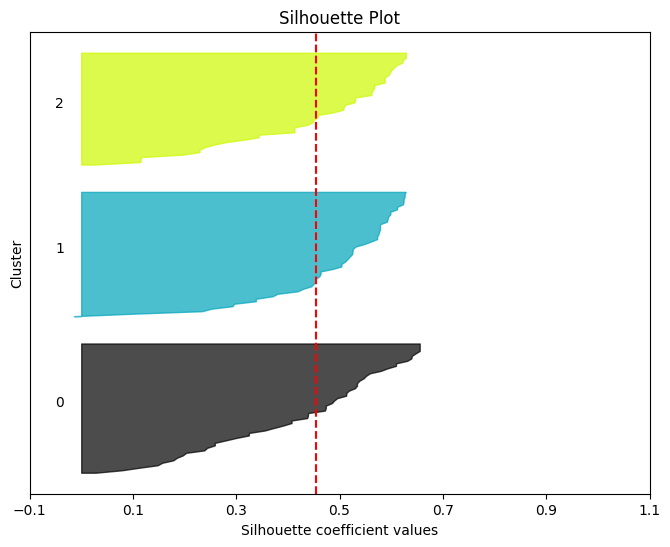

Final Centroids:
 [[5.8        2.7       ]
 [5.00392157 3.40980392]
 [6.82391304 3.07826087]]
Cluster Assignments:
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 0 2 0 2 0 2 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0
 2 2 2 2 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 2 2 1 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
Silhouette Scores:
 [ 0.59829253  0.42933919  0.57271912  0.52503603  0.62275881  0.45377906
  0.59400234  0.61133154  0.41888819  0.50350935  0.4497274   0.62385639
  0.46322163  0.44509038  0.23408072  0.29256336  0.45377906  0.59829253
  0.25178624  0.57829805  0.33795251  0.5928415   0.59158727  0.53088439
  0.62385639  0.37040333  0.61133154  0.5476874   0.51565525  0.57271912
  0.52568605  0.33795251  0.48683249  0.37981819  0.50350935  0.5244864
  0.29616117  0.62788195  0.46076806  0.57534556  0.62587141  0.10183264
  0.51983318  0.62587141  0.57829805  0.46322163

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

def initialize_centroids(X, K):
    np.random.seed(42)  # For reproducibility
    random_indices = np.random.permutation(X.shape[0])
    centroids = X[random_indices[:K]]
    return centroids

def assign_clusters(X, centroids):
    distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
    cluster_assignments = np.argmin(distances, axis=1)
    return cluster_assignments

def update_centroids(X, cluster_assignments, K):
    new_centroids = np.array([X[cluster_assignments == k].mean(axis=0) for k in range(K)])
    return new_centroids

def kmeans(X, K, max_iters=100, tol=1e-4):
    centroids = initialize_centroids(X, K)
    for i in range(max_iters):
        cluster_assignments = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, cluster_assignments, K)

        # Check for convergence
        if np.all(np.linalg.norm(new_centroids - centroids, axis=1) < tol):
            break

        centroids = new_centroids

    return centroids, cluster_assignments

def calculate_silhouette_scores(X, cluster_assignments, centroids):
    n_samples = X.shape[0]
    K = centroids.shape[0]
    silhouette_scores = np.zeros(n_samples)

    for i in range(n_samples):
        # Calculate a(i)
        own_cluster = cluster_assignments[i]
        own_cluster_points = X[cluster_assignments == own_cluster]
        a_i = np.mean(np.linalg.norm(own_cluster_points - X[i], axis=1))

        # Calculate b(i)
        b_i = np.inf
        for k in range(K):
            if k == own_cluster:
                continue
            other_cluster_points = X[cluster_assignments == k]
            b_i_k = np.mean(np.linalg.norm(other_cluster_points - X[i], axis=1))
            if b_i_k < b_i:
                b_i = b_i_k

        # Calculate silhouette score for point i
        silhouette_scores[i] = (b_i - a_i) / max(a_i, b_i)

    return silhouette_scores

def plot_silhouette_diagram(X, cluster_assignments, silhouette_scores):
    n_clusters = np.unique(cluster_assignments).shape[0]
    y_lower = 10
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(8, 6)

    for i in range(n_clusters):
        ith_cluster_silhouette_values = silhouette_scores[cluster_assignments == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = plt.cm.nipy_spectral(float(i) / n_clusters)

        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10

    ax1.set_title("Silhouette Plot")
    ax1.set_xlabel("Silhouette coefficient values")
    ax1.set_ylabel("Cluster")
    ax1.axvline(x=np.mean(silhouette_scores), color="red", linestyle="--")
    ax1.set_yticks([])  # Clear the y-axis labels / ticks
    ax1.set_xticks(np.arange(-0.1, 1.1, 0.2))

    plt.show()

# Example usage with a dataset
iris = load_iris()
X = iris.data[:, :2]

# Number of clusters
K = 3

# Perform K-means clustering
centroids, cluster_assignments = kmeans(X, K)

# Calculate silhouette scores
silhouette_scores = calculate_silhouette_scores(X, cluster_assignments, centroids)

# Plot silhouette diagram
plot_silhouette_diagram(X, cluster_assignments, silhouette_scores)

print("Final Centroids:\n", centroids)
print("Cluster Assignments:\n", cluster_assignments)
print("Silhouette Scores:\n", silhouette_scores)


Silhouette Scores Calculation:

calculate_silhouette_scores(X, cluster_assignments, centroids) calculates the silhouette score for each data point. It first calculates
𝑎
(
𝑖
)
a(i) as the mean distance between the point and other points in the same cluster. It then calculates
𝑏
(
𝑖
)
b(i) as the minimum mean distance between the point and points in other clusters.
Plotting Silhouette Diagram:

plot_silhouette_diagram(X, cluster_assignments, silhouette_scores) plots the silhouette diagram. Each cluster's silhouette scores are plotted, with the average silhouette score marked with a red dashed line.
This code performs K-means clustering on the Iris dataset (using the first two features) and plots the silhouette diagram to visualize the quality of the clustering. The silhouette scores help assess how well each data point is clustered, with higher scores indicating better clustering.